In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import sklearn

In [4]:
df= pd.read_csv('cardio_train.csv', sep=';')

In [5]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
df.shape

(70000, 13)

In [7]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

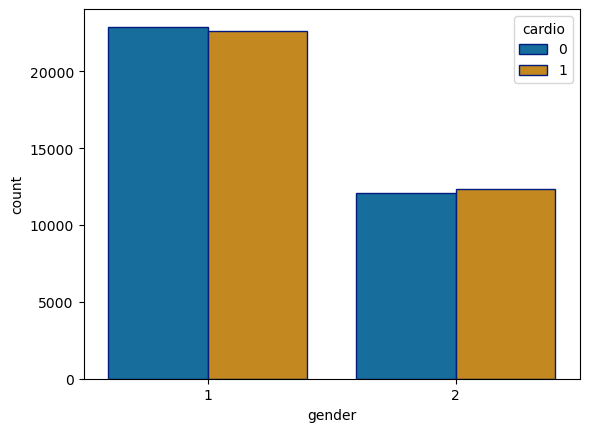

In [8]:
seaborn.countplot(x='gender', hue='cardio', data=df, palette='colorblind', edgecolor=seaborn.color_palette('dark', n_colors=1))

In [13]:
df['yr']=(df['age']/365).round(0)

In [14]:
df['yr']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: yr, Length: 70000, dtype: float64

In [16]:
df=df.drop(['yr'], axis=1)

In [19]:
from sklearn.feature_selection import SelectKBest

In [21]:
from sklearn.feature_selection import f_classif

In [24]:
FIT_Features= SelectKBest(score_func=f_classif)

In [25]:
FIT_Features.fit(x,y)

SelectKBest()

In [31]:
scor_col=pd.DataFrame(FIT_Features.scores_, columns=['Score_values'])

In [32]:
scor_col

,Score_values
0,1.010461
1,4209.007957
2,4.603641
3,8.197397
4,2388.777887
5,208.339524
6,303.629011
7,3599.361137
8,562.772977
9,16.790541


In [33]:
name_col=pd.DataFrame(x.columns)

In [42]:
topr_features=pd.concat([name_col,scor_col], axis=1)

In [43]:
topr_features

,0,Score_values
0,id,1.010461
1,age,4209.007957
2,gender,4.603641
3,height,8.197397
4,weight,2388.777887
5,ap_hi,208.339524
6,ap_lo,303.629011
7,cholesterol,3599.361137
8,gluc,562.772977
9,smoke,16.790541


In [46]:
topr_features.nlargest(8, 'Score_values')

,0,Score_values
1,age,4209.007957
7,cholesterol,3599.361137
4,weight,2388.777887
8,gluc,562.772977
6,ap_lo,303.629011
5,ap_hi,208.339524
11,active,89.091494
9,smoke,16.790541


In [50]:
df.shape

(70000, 13)

In [ ]:
df=df.drop([''], axis=1)

In [47]:
x=df.iloc[:,:-1]

In [48]:
x

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,18393,2,168,62.0,110,80,1,1,0,0,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0


In [51]:
y=df.iloc[:,12]

In [52]:
from sklearn.ensemble import ExtraTreesClassifier

In [53]:
model=ExtraTreesClassifier()

In [54]:
model.fit(x,y)

ExtraTreesClassifier()

In [55]:
model.feature_importances_

array([0.15927869, 0.20514268, 0.0064098 , 0.13614781, 0.14754311,
       0.16907937, 0.10470874, 0.04602655, 0.01209687, 0.00415638,
       0.00423699, 0.00517302])

In [57]:
top=pd.Series(model.feature_importances_, index=x.columns)

In [58]:
top

id             0.159279
age            0.205143
gender         0.006410
height         0.136148
weight         0.147543
ap_hi          0.169079
ap_lo          0.104709
cholesterol    0.046027
gluc           0.012097
smoke          0.004156
alco           0.004237
active         0.005173
dtype: float64

<AxesSubplot:>

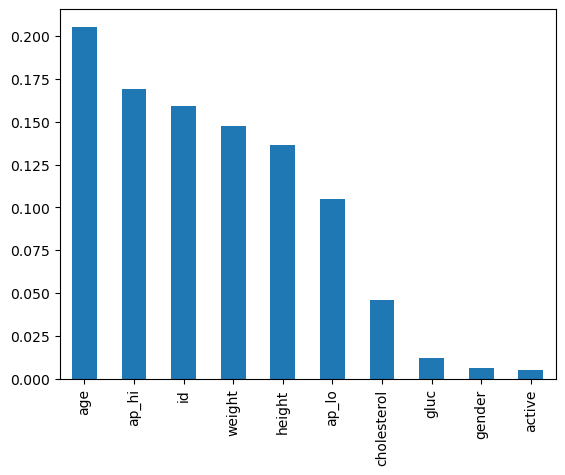

In [61]:
top.nlargest(10).plot(kind='bar')

<AxesSubplot:>

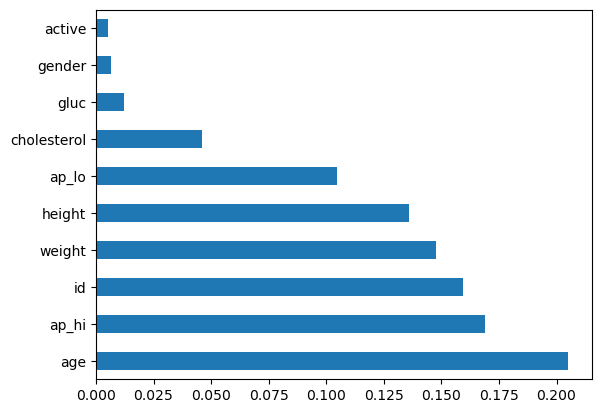

In [62]:
top.nlargest(10).plot(kind='barh')

<AxesSubplot:ylabel='Frequency'>

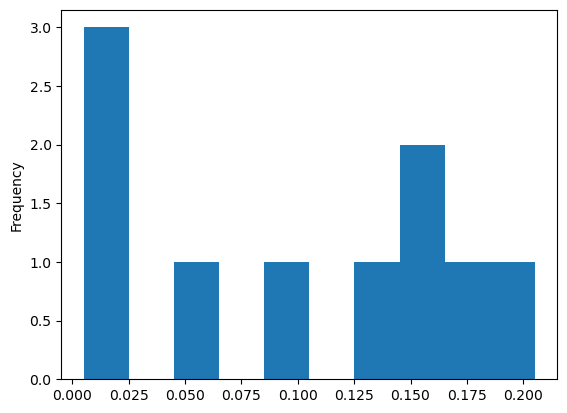

In [63]:
top.nlargest(10).plot(kind='hist')

<AxesSubplot:>

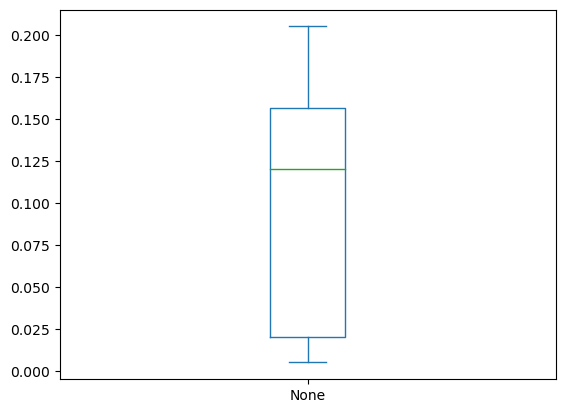

In [64]:
top.nlargest(10).plot(kind='box')

<AxesSubplot:ylabel='None'>

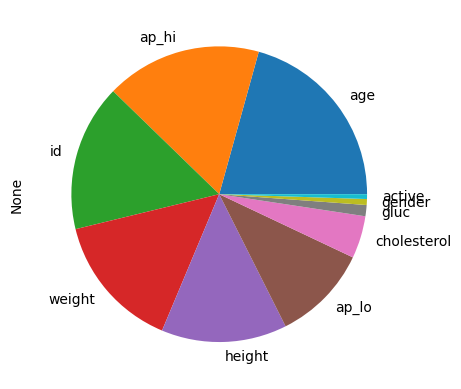

In [65]:
top.nlargest(10).plot(kind='pie')